<a href="https://colab.research.google.com/github/uday96/EVA4-TSAI/blob/master/S12/EVA4_S12_B_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Initialization

Import required modules

In [0]:
import numpy as np
import json
import pprint

from annotater import Annotater

## Annotated BBox Data

Used this tool - http://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html to annotate 50 images of dogs.

dog_images: '**data/annotations/dogs**'

dog_annotations: '**data/annotations/annotations_dogs.json**'

The downloaded annotations are in COCO format:
```
{
  "info": {
    Annotater tool metadata
  },
  "images": [
    {
      "id": unique internal identifier for the image,
      "width": width of the image,
      "height": height of the image,
      "file_name": image file name,
      "license": identifier for the correspnding license,
      "date_captured": date when captured
    },
  ],
  "annotations": [
    {
      "id": unique internal identifier for the annotation,
      "image_id": identifier mapping to the image through images.id,
      "category_id": identifier mapping to the category through categories.id,
      "segmentation": [
        4 pairs of (x,y) coordinates of the bbox starting from the top left corner,
        in the clockwise direction, assuming the origin is at the top left corner
        of the image
      ],
      "area": pixel area of the bbox,
      "bbox": [
        assuming the origin is at the top left corner of the image
        x: x co-ordinate of top left corner of bbox,
        y: y co-ordinate of top left corner of bbox ,
        w: width of the bbox,
        h: height of the bbox,
      ],
      "iscrowd": denotes if there is are multiple objects or single object
    },
  ],
  "licenses": [
    {
      "id": unique internal identifier for the license,
      "name": license name,
      "url": license url
    }
  ],
  "categories": [
    {
      "id": unique internal identifier for the class,
      "name": class name,
      "supercategory": "class"
    },
  ]
}
```



In [2]:
in_path = "/content/data/annotations/annotations_dogs.json"
with open(in_path, 'r') as f:
			annotations = json.load(f)
print(annotations.keys(), "\n")
pprint.pprint(annotations["images"][0])
print()
pprint.pprint(annotations["annotations"][0])
print()
pprint.pprint(annotations["categories"][0])

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories']) 

{'date_captured': '',
 'file_name': 'dog_0.jpg',
 'height': 183,
 'id': 0,
 'license': 1,
 'width': 275}

{'area': 32041,
 'bbox': [2, 2, 179, 179],
 'category_id': 1,
 'id': 0,
 'image_id': '0',
 'iscrowd': 0,
 'segmentation': [2, 2, 181, 2, 181, 181, 2, 181]}

{'id': 1, 'name': 'dog', 'supercategory': 'class'}


## Anchor Boxes

Initialize the annotater. Parse the image annotations and generate the scaled bounding boxes

In [3]:
in_path = "/content/data/annotations/annotations_dogs.json"
out_path = "/content/data/annotations/bboxes_dogs.csv"
ant = Annotater(in_path, out_path)

Saved image bbox data at: /content/data/annotations/bboxes_dogs.csv

Showing the first few rows of generated bbox data:

    img_name class  img_h  ...  bbox_scaled_y  bbox_scaled_w  bbox_scaled_h
0  dog_0.jpg   dog    183  ...       0.010929       0.650909       0.978142
1  dog_1.jpg   dog    183  ...       0.087432       0.730909       0.896175
2  dog_2.jpg   dog    168  ...       0.000000       0.783333       0.988095
3  dog_3.jpg   dog    174  ...       0.126437       0.294118       0.764368
4  dog_4.jpg   dog    183  ...       0.065574       0.949091       0.874317

[5 rows x 12 columns]


### Visualise Bounding Boxes

Visualise the scaled bounding boxes of all the images

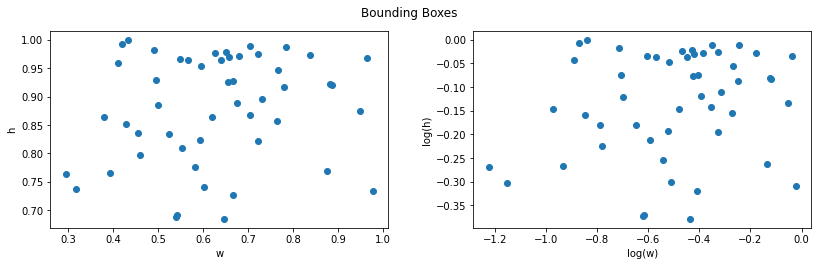

In [4]:
ant.show_bboxes()

### Determine optimal number of clusters

Determine the optimal number of clusters using the elbow method or mean IoU method. We train multiple models using a different number of clusters and store the value of:

*   **Elbow method**: intertia_ property (WCSS)
*   **Mean IOU method**: mean of Intersection over Union



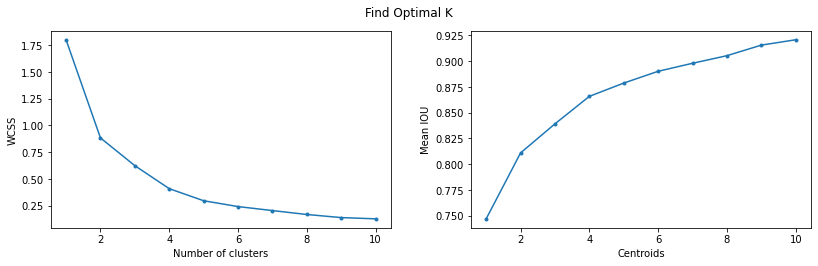

In [5]:
ks = [i for i in range(1,11)]
ant.fit_compare(ks)

In [6]:
ks = [3,4,5,6,7,8]
for k in ks:
  miou = ant.kmeans_map[k]["mean_iou"]
  print("Mean IOU for %s: %s" % (k, miou))

Mean IOU for 3: 0.8391543070114013
Mean IOU for 4: 0.8658102565543397
Mean IOU for 5: 0.8786993110742413
Mean IOU for 6: 0.8901302636018044
Mean IOU for 7: 0.8979057995199584
Mean IOU for 8: 0.9052679601295067


### Generate Template Bounding Boxes

Get the optimal number of clusters from Elbow method and cluster the data

Centroids: [[0.58260932 0.75270229]
 [0.91004486 0.87959827]
 [0.38918022 0.80225897]
 [0.4823328  0.95953503]
 [0.69143415 0.93029017]]
Mean IOU: 0.8786993110742413


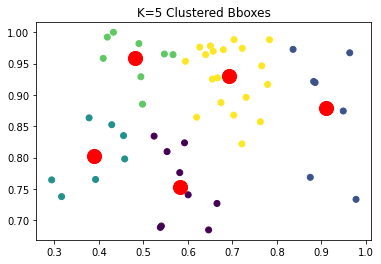

In [7]:
ant.show_k(5)

Centroids: [[0.92232506 0.86408505]
 [0.38918022 0.80225897]
 [0.64459123 0.94761572]
 [0.58260932 0.75270229]
 [0.7561316  0.91567642]
 [0.47028511 0.95885636]]
Mean IOU: 0.8901302636018044


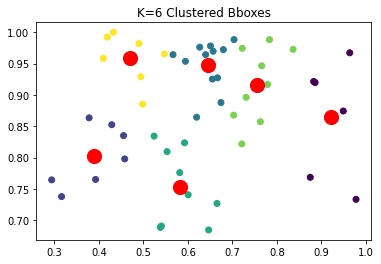

In [8]:
ant.show_k(6)

Centroids: [[0.64857487 0.95483271]
 [0.38918022 0.80225897]
 [0.88347826 0.94057948]
 [0.58260932 0.75270229]
 [0.73395483 0.88481587]
 [0.47028511 0.95885636]
 [0.92638889 0.75090312]]
Mean IOU: 0.8979057995199584


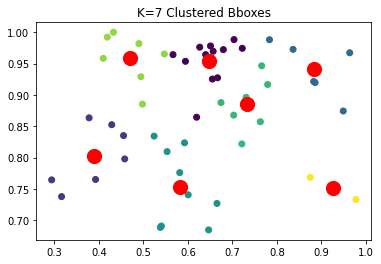

In [9]:
ant.show_k(7)

Centroids: [[0.7381377  0.90624059]
 [0.46563565 0.97112477]
 [0.34534759 0.78262201]
 [0.50159179 0.83397836]
 [0.92638889 0.75090312]
 [0.90350725 0.93107633]
 [0.59556573 0.71784047]
 [0.64187965 0.9530576 ]]
Mean IOU: 0.9052679601295067


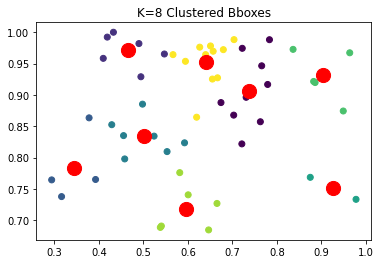

In [10]:
ant.show_k(8)

**7 looks like the best fit for the number of anchor boxes**